In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

#### Calcuate the likelihoods for each tweet
 
For each tweet, we have calculated the likelihood of the tweet to be positive and the likelihood to be negative. We have calculated in different columns the numerator and denominator of the likelihood ratio introduced previously.
 
𝑙𝑜𝑔(𝑃(𝑡𝑤𝑒𝑒𝑡|𝑝𝑜𝑠) / 𝑃(𝑡𝑤𝑒𝑒𝑡|𝑛𝑒𝑔)) = 𝑙𝑜𝑔(𝑃(𝑡𝑤𝑒𝑒𝑡|𝑝𝑜𝑠))−𝑙𝑜𝑔(𝑃(𝑡𝑤𝑒𝑒𝑡|𝑛𝑒𝑔))
 
𝑝𝑜𝑠𝑖𝑡𝑖𝑣𝑒 = 𝑙𝑜𝑔(𝑃(𝑡𝑤𝑒𝑒𝑡|𝑝𝑜𝑠)) = ∑𝑙𝑜𝑔𝑃(𝑊𝑖|𝑝𝑜𝑠)
 
𝑛𝑒𝑔𝑎𝑡𝑖𝑣𝑒 = 𝑙𝑜𝑔(𝑃(𝑡𝑤𝑒𝑒𝑡|𝑛𝑒𝑔)) = ∑𝑙𝑜𝑔𝑃(𝑊𝑖|𝑛𝑒𝑔)

In [4]:
data = pd.read_csv('bayes_features.csv')
data.head(5)

,positive,negative,sentiment
0,-45.763393,-63.351354,1.0
1,-105.491568,-114.204862,1.0
2,-57.028078,-67.216467,1.0
3,-10.055885,-18.589057,1.0
4,-125.749270,-138.334845,1.0


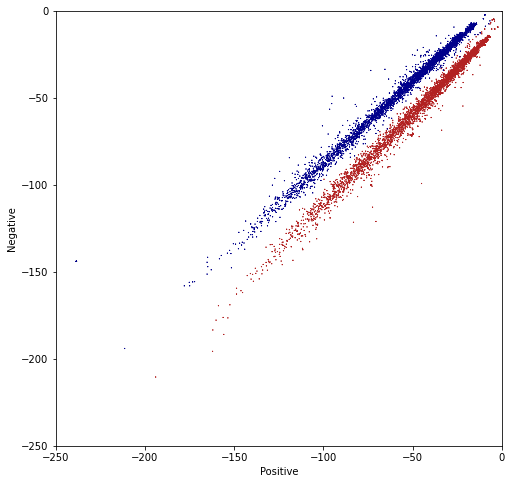

In [6]:
# plot the samples
fig, ax = plt.subplots(figsize=(8, 8))
color = ['darkblue', 'firebrick']

# color base on sentiment
ax.scatter(data['positive'], data['negative'],
           c=[color[int(k)] for k in data['sentiment']], s=0.1, marker='*')

plt.xlim(-250, 0)
plt.ylim(-250, 0)

plt.xlabel('Positive')
plt.ylabel('Negative')
plt.show()

#### Using Confidence Ellipses to interpret Naive Bayes
 
A confidence ellipse is a way to visualize a 2D random variable. It is a better way than plotting the points over a cartesian plane because, with big datasets, the points can overlap badly and hide the real distribution of the data. Confidence ellipses summarize the information of the dataset with only four parameters:
 
- Center: It is the numerical mean of the attributes
- Height and width: Related with the variance of each attribute. The user must specify the - desired amount of standard deviations used to plot the ellipse.
- Angle: Related with the covariance among attributes.
 
The parameter **n_std** stands for the number of standard deviations bounded by the ellipse. Remember that for normal random distributions:

- About 68% of the area under the curve falls within 1 standard deviation around the mean.
- About 95% of the area under the curve falls within 2 standard deviations around the mean.
- About 99.7% of the area under the curve falls within 3 standard deviations around the mean.

In [13]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.
    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.
    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.
    Returns
    -------
    matplotlib.patches.Ellipse
    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
                      width=ell_radius_x * 2,
                      height=ell_radius_y * 2,
                      facecolor=facecolor,
                      **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

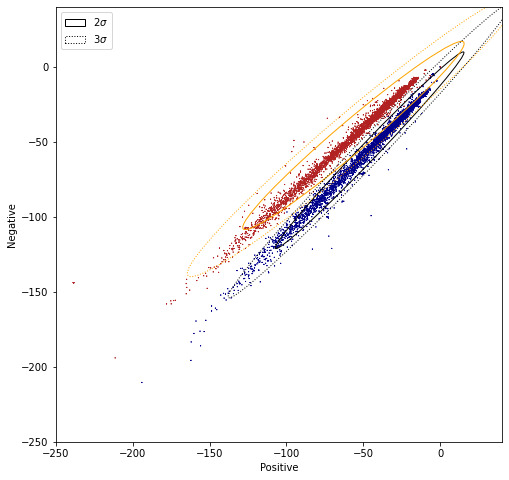

In [23]:
fig, ax = plt.subplots(figsize=(8, 8))

colors = ['firebrick', 'darkblue']

ax.scatter(data['positive'], data['negative'],
           c=[colors[int(k)] for k in data['sentiment']], s=0.1, marker='*')

plt.xlim(-250, 40)
plt.ylim(-250, 40)

plt.xlabel('Positive')
plt.ylabel('Negative')

data_pos = data[data['sentiment'] == 1]
data_neg = data[data['sentiment'] == 0]

# print confidence ellipses of 2 std
confidence_ellipse(data_pos['positive'], data_pos['negative'],
                    ax, n_std=2, edgecolor='black', label=r'$2\sigma$')
confidence_ellipse(data_neg['positive'], data_neg['negative'],
                    ax, n_std=2, edgecolor='orange')

# print confidence ellipses of 3 std
confidence_ellipse(data_pos['positive'], data_pos['negative'],
                    ax, n_std=3, edgecolor='black', linestyle=':', label=r'$3\sigma$')
confidence_ellipse(data_neg['positive'], data_neg['negative'],
                    ax, n_std=3, edgecolor='orange', linestyle=':')
ax.legend()

plt.show()

In [20]:
data2 = data.copy() # Copy the whole data frame

# The following 2 lines only modify the entries in the data frame where sentiment == 1
data2['negative'][data['sentiment'] == 1] = data2['negative'] * 1.5 + 50   # Modify the negative attribute
data2['positive'][data['sentiment'] == 1] = data2['positive'] / 1.5 - 50   # Modify the positive attribute 

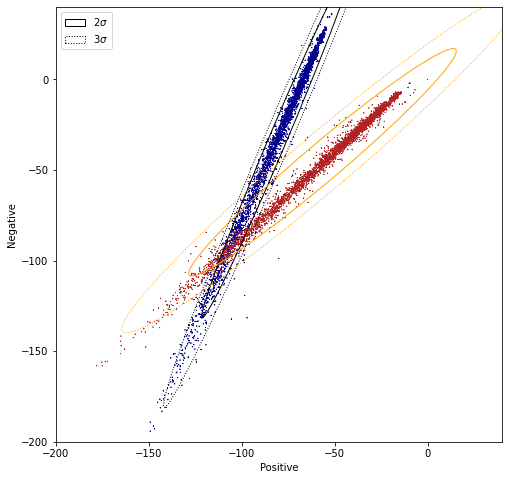

In [22]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['firebrick', 'darkblue'] # Define a color palete

# Color base on sentiment
ax.scatter(data2.positive, data2.negative, c=[colors[int(k)] for k in data2.sentiment], s = 0.1, marker='*')  # Plot a dot for tweet
# Custom limits for this chart
plt.xlim(-200,40)  
plt.ylim(-200,40)

plt.xlabel("Positive") # x-axis label
plt.ylabel("Negative") # y-axis label

data_pos = data2[data2.sentiment == 1] # Filter only the positive samples
data_neg = data[data2.sentiment == 0] # Filter only the negative samples

# Print confidence ellipses of 2 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=2, edgecolor='black', label=r'$2\sigma$')
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=2, edgecolor='orange')

# Print confidence ellipses of 3 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=3, edgecolor='black', linestyle=':', label=r'$3\sigma$')
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=3, edgecolor='orange', linestyle=':')
ax.legend()

plt.show()